# Exploração de dados das bases de matemática e português

* Importando bibliotecas

In [6]:
import pandas as pd
import numpy as snp
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import copy

* Importando base de dados

In [7]:
df_mat = pd.read_csv("student-mat.csv")
df_port = pd.read_excel("student-por.xlsx")

* Para matemática

In [8]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


* Para português

In [11]:
df_port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


* Features das bases de dados

In [14]:
df_mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

* Distribuição da base de matemática

In [16]:
df_mat.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


* Distribuição da base de português

In [18]:
df_port.describe().T

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


* Filtrando alunos por escola

In [21]:
# Base de Matemática
df_mat_GP = df_mat.loc[(df_mat["school"]=="GP")]
df_mat_MS = df_mat.loc[(df_mat["school"]=="MS")]

In [26]:
# Base de português
df_port_GP = df_port.loc[(df_port["school"]=="GP")]
df_port_MS = df_port.loc[(df_port["school"]=="MS")]

* Pode-se percerber um desbalanceamento dos dados quanto as amostras para cada escola

In [24]:
# Proporção de alunos por escola na base de matemática
print(df_mat_GP.shape)
print(df_mat_MS.shape)

(349, 33)
(46, 33)


In [27]:
# Proporção de alunos por escola na base de português
print(df_port_GP.shape)
print(df_port_MS.shape)

(423, 33)
(226, 33)


* Analizando correlação entre atributos

<AxesSubplot:>

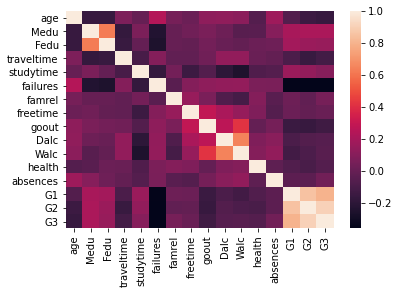

In [28]:
# Matemática
sns.heatmap(df_mat.corr())

<AxesSubplot:>

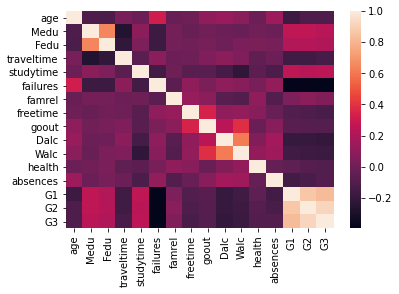

In [30]:
# Português
sns.heatmap(df_port.corr())

* Distribuição geral de alunos por sexo e idade

Text(0, 0.5, '% data distribution')

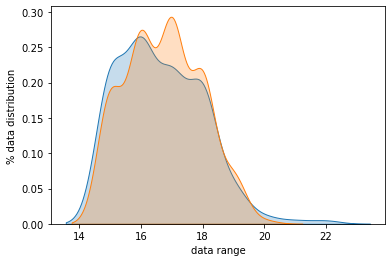

In [32]:
# Matemática
sns.kdeplot(df_mat.groupby('sex').get_group('M')['age'], shade = True,label = 'male')
sns.kdeplot(df_mat.groupby('sex').get_group('F')['age'], shade = True, label = 'female')
plt.xlabel('data range')
plt.ylabel('% data distribution')

Text(0, 0.5, '% data distribution')

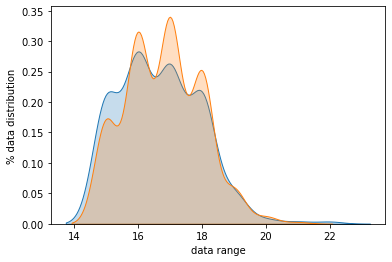

In [33]:
# Português
sns.kdeplot(df_port.groupby('sex').get_group('M')['age'], shade = True,label = 'male')
sns.kdeplot(df_port.groupby('sex').get_group('F')['age'], shade = True, label = 'female')
plt.xlabel('data range')
plt.ylabel('% data distribution')

* Calculándo média das notas

In [37]:
df_mat['mean_grades'] = (df_mat.G1 + df_mat.G2 + df_mat.G3) / 3
df_port['mean_grades'] = (df_port.G1 + df_port.G2 + df_port.G3) / 3

* Distribuição da média na base de matemática

(array([10., 17., 33., 43., 76., 73., 62., 52., 16., 13.]),
 array([ 1.33333333,  3.13333333,  4.93333333,  6.73333333,  8.53333333,
        10.33333333, 12.13333333, 13.93333333, 15.73333333, 17.53333333,
        19.33333333]),
 <BarContainer object of 10 artists>)

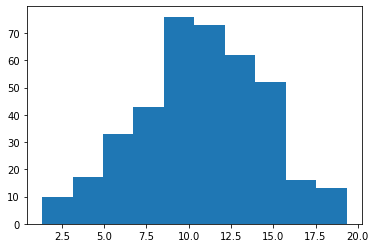

In [39]:
plt.hist(df_mat.mean_grades)

* Distribuição de média na base de português

(array([  7.,   5.,   5.,  41., 141., 145., 146.,  87.,  46.,  26.]),
 array([ 1.33333333,  3.06666667,  4.8       ,  6.53333333,  8.26666667,
        10.        , 11.73333333, 13.46666667, 15.2       , 16.93333333,
        18.66666667]),
 <BarContainer object of 10 artists>)

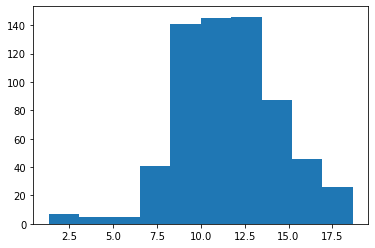

In [41]:
plt.hist(df_port.mean_grades)

### Análise de proporção de atributos entre os sexos masculinos e feminos

* Para matemática

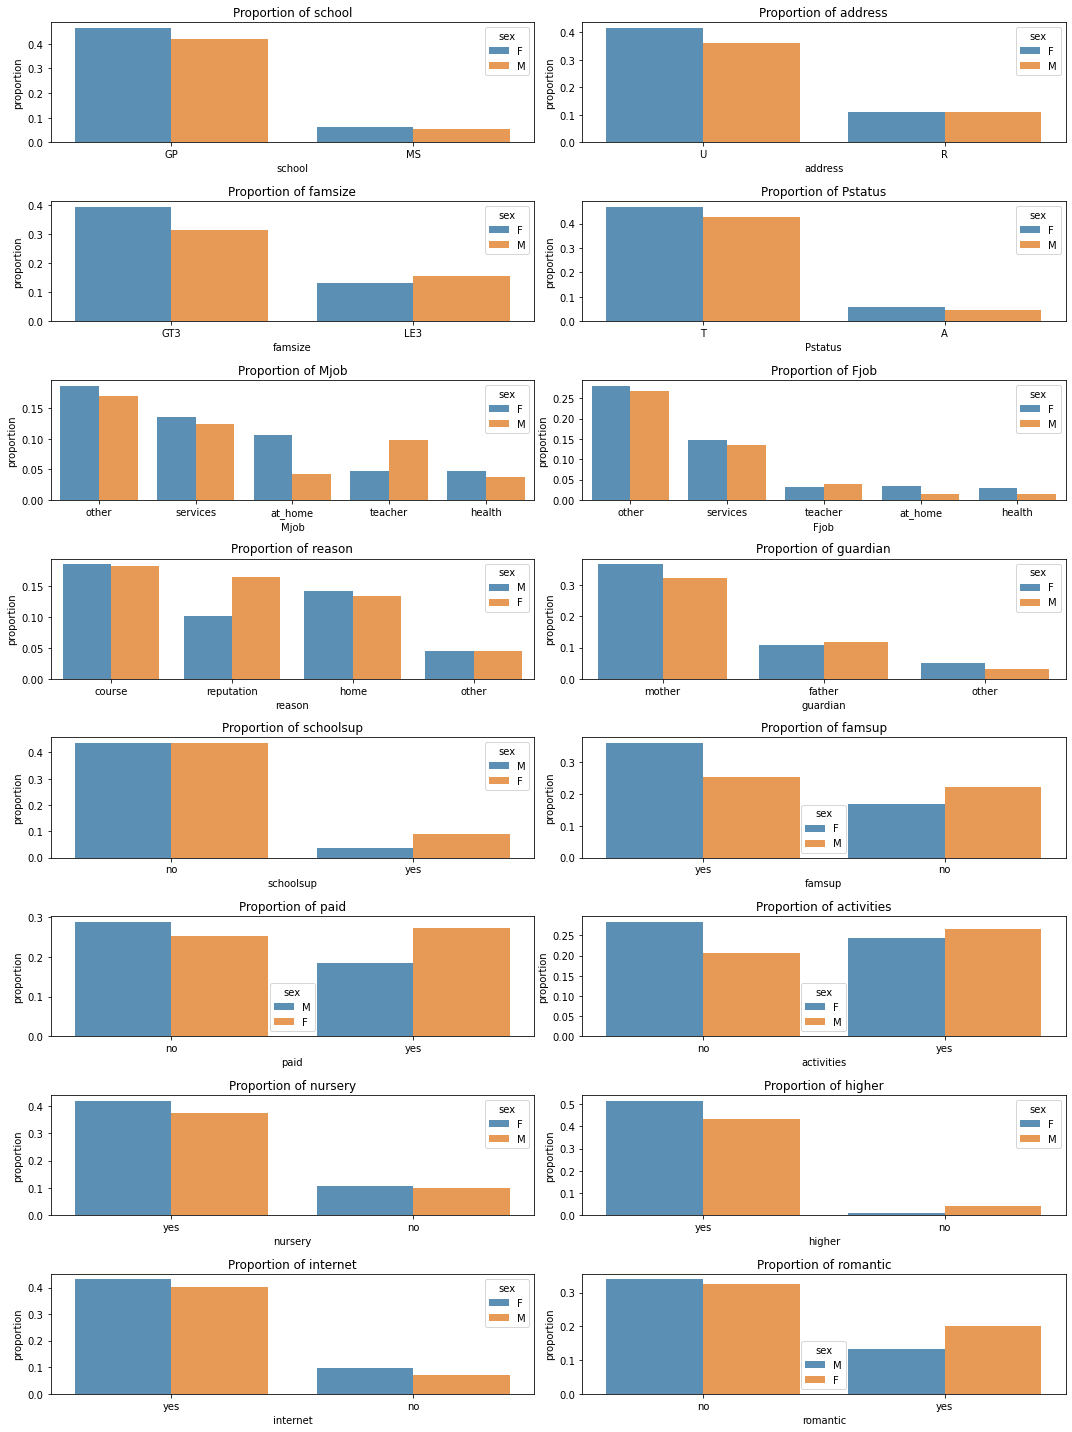

In [43]:
cols_obj = list(df_mat.dtypes[df_mat.dtypes == object].index[0:])
cols_obj.pop(1)
i=1
plt.figure(figsize=[15,20])
y, hue = 'proportion', 'sex'

for f in cols_obj:
    plt.subplot(8,2,i)
    df_mat[[f, 'sex']]\
       .value_counts(normalize=True)\
       .rename(y)\
       .reset_index()\
       .pipe((sns.barplot, "data"), x=f, y='proportion', hue='sex', alpha=0.8)
    plt.title(f'Proportion of {f}')
    i+=1
plt.tight_layout()

* Para português

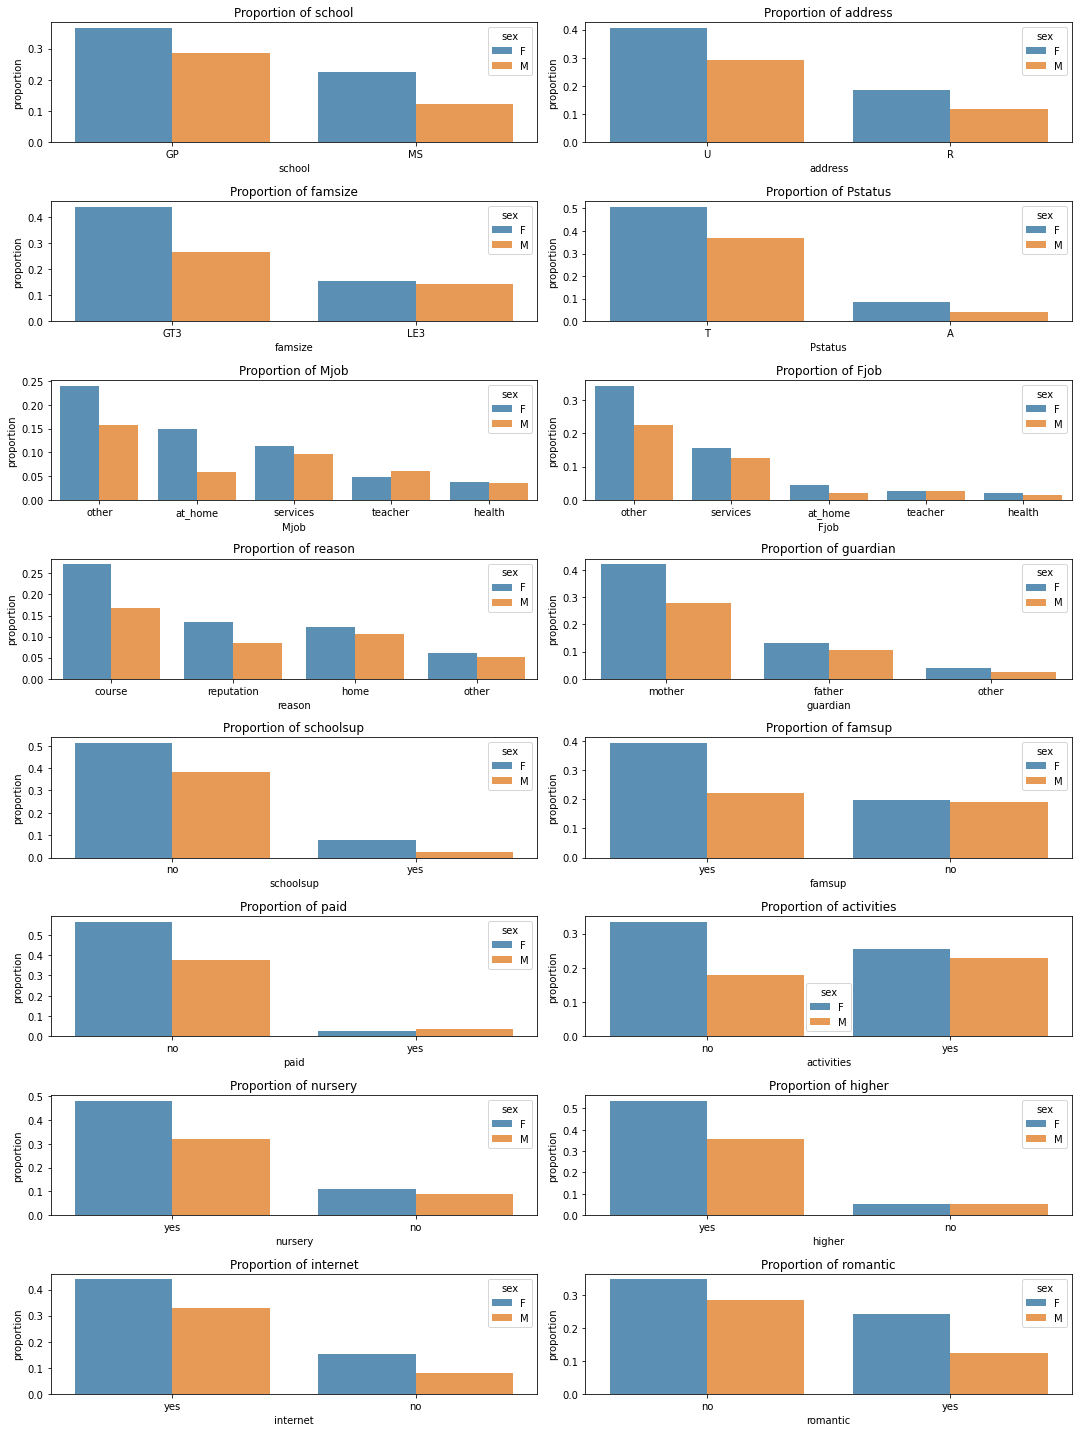

In [44]:
cols_obj = list(df_port.dtypes[df_port.dtypes == object].index[0:])
cols_obj.pop(1)
i=1
plt.figure(figsize=[15,20])
y, hue = 'proportion', 'sex'

for f in cols_obj:
    plt.subplot(8,2,i)
    df_port[[f, 'sex']]\
       .value_counts(normalize=True)\
       .rename(y)\
       .reset_index()\
       .pipe((sns.barplot, "data"), x=f, y='proportion', hue='sex', alpha=0.8)
    plt.title(f'Proportion of {f}')
    i+=1
plt.tight_layout()

### BoxPlot

* Para matemática

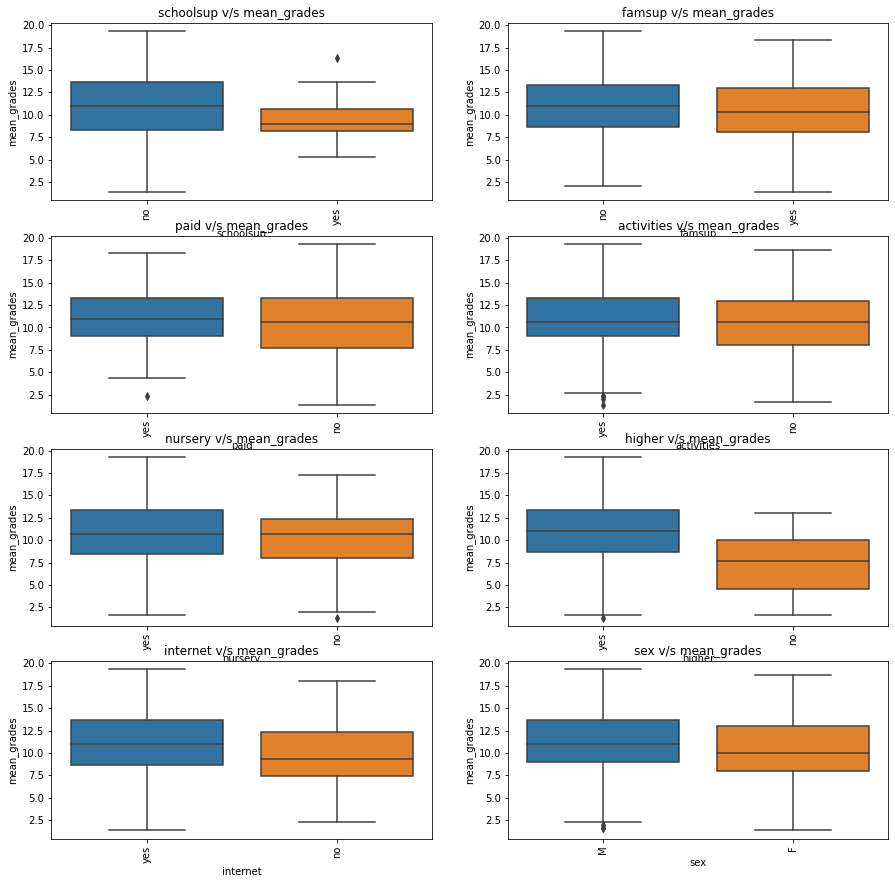

In [46]:
plt.figure(figsize = (15,15))
for i, item in enumerate(['schoolsup', 'famsup', 'paid','activities',
       'nursery', 'higher', 'internet', 'sex']):
    plt.subplot(4,2,i+1)
    order_by = df_mat.groupby(item)['mean_grades'].median().sort_values(ascending = False).index
    sns.boxplot(x = df_mat[item], y = df_mat['mean_grades'],order = order_by)
    plt.xticks(rotation = 90)
    plt.title(item+' v/s mean_grades')

* Português

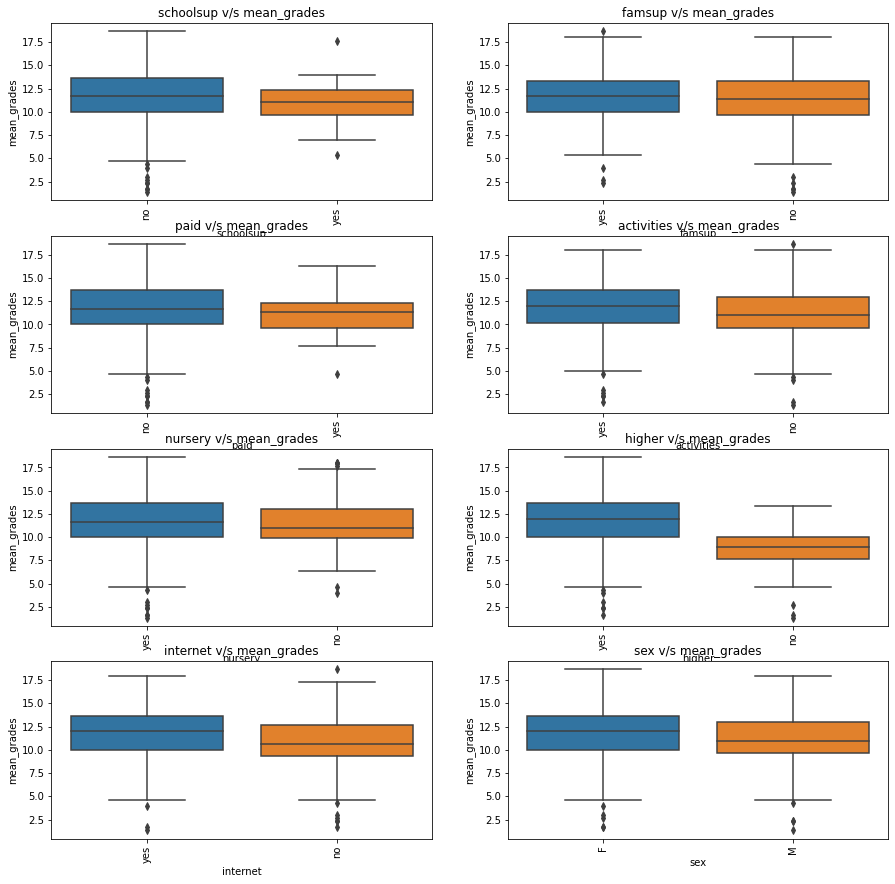

In [47]:
plt.figure(figsize = (15,15))
for i, item in enumerate(['schoolsup', 'famsup', 'paid','activities',
       'nursery', 'higher', 'internet', 'sex']):
    plt.subplot(4,2,i+1)
    order_by = df_port.groupby(item)['mean_grades'].median().sort_values(ascending = False).index
    sns.boxplot(x = df_port[item], y = df_port['mean_grades'],order = order_by)
    plt.xticks(rotation = 90)
    plt.title(item+' v/s mean_grades')

### Relação entre: tempo de estudo, sexo e notas

* Matemática

<AxesSubplot:xlabel='studytime', ylabel='mean_grades'>

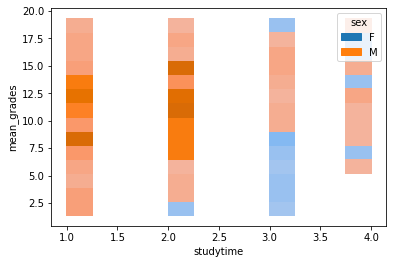

In [48]:
sns.histplot(data=df_mat, x='studytime', y='mean_grades', hue='sex')

* Português

<AxesSubplot:xlabel='studytime', ylabel='mean_grades'>

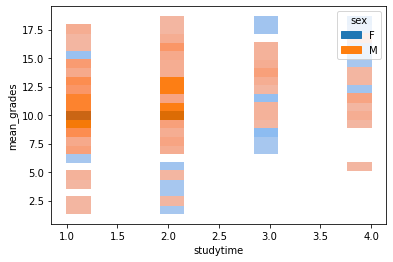

In [49]:
sns.histplot(data=df_port, x='studytime', y='mean_grades', hue='sex')